In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
import sklearn
import networkx

# REPORT 5 

#### Belén Ximena Herrada Ruiz - 20203026

#### Lectura: Metas de Inflación en el Perú: las razones del éxito - Oscar Dancourt 

El artículo de investigación “Metas de Inflación en el Perú: las razones del éxito” escrito por Oscar Dancourt se plantea analizar el trabajo realizado por el BCRP, específicamente en 2002 al 2013, con respecto al impacto del uso de ciertas políticas monetarios como instrumentos para enfrentar la inflación, tales como la tasa de interés de corto plazo fijada por el banco, el coeficiente de encaje legal en moneda nacional y extranjera y, la intervención esterilizada en el mercado de divisas. 

Para poder lograr este análisis se ha podido identificar el rastreamiento de políticas implementadas previas a años periodos, lo que se puede reconocer como una fortaleza, ya que esto contribuye a plantear un panorama completo sobre el desarrollo del Banco Central y su contribución directa a la preservación de la estabilidad macroeconómica. Las decisiones tomadas a las que se hace referencia son la implementación de metas de inflación y la acumulación de suficientes reservas de divisas. Asimismo, otra fortaleza identificada fue la identificación per se de los principales instrumentos de política monetaria utilizados, porque esto brinda una delimitación con respecto a las causas que contribuyeron al éxito, lo cual brinda una respuesta directa. Esto se puede relacionar de igual manera con el posicionamiento de  la existencia de factores externos que puede contribuir a confundir el buen rendimiento macroeconómico de las políticas monetarias. Por otro lado, la utilización de diversos gráficos para demostrar el transcurso de diversos factores como en la compra de dólares y la variación porcentual del tipo de cambio o el índice de tipo de cambio nominal y real, que poseen una gran influencia. Todo lo mencionado anteriormente nos ayuda a poder reconocer la contribución de la investigación realizada, la cual se puede traducir en el establecimiento de políticas que tienen una alta efectividad para la economía para peruana al lograr una baja inflación, un alto crecimiento del PBI y el impedimento de altas recesiones severas tanto en contextos externos favorables y desfavorables. 

No obstante, una de las debilidades encontradas en el documento es la misma delimitación al actuar del BCRP, debido a que no utiliza la participación de otros actores sociales y los costos en aspectos socioculturales; entonces, bajo esta misma línea para poder avanzar con respecto a la pregunta planteada sería identificar la influencia y consecuencias de otros actores, tal cómo es planteado por Schuldt en Inflación, devaluación y lucha de grupos sociales en América Latina. 



#### Códigos trabajados con Katherine Milla 20200526

### 1. Demanda Agregada ($DA$):

Matemáticamente, la forma de la función de demanda agregada se puede obtener de las ecuaciones de la IS y la LM, eliminando “r” y despejando P. Para efectuar esta operación se supondrá que P no está dado.

Considernado, por un lado, la Curva IS:

$$ r= \frac{\beta_0}{h}-\frac{\beta_1}{h}Y  $$

Donde:

$ \beta_0 = C_o + I_o + G_o + X_o $ y $ \beta_1 = 1 - (b - m)(1 - t) $

La ecuación de curva LM:

$$ r = -\frac{1}{j} \frac{M_0^s}{P_0}+ \frac{k}{j}Y  $$

Eliminando r y despejando P, se obtiene:

$$\frac{\beta_0}{h}-\frac{\beta_1}{h}Y= -\frac{1}{j} \frac{M_0^s}{P_0}+ \frac{k}{j}Y $$

$$\frac{1}{j} \frac{M_0^s}{P_0}=\frac{kY}{j}+\frac{\beta_1Y}{h}-\frac{\beta_0}{h}$$

$$\frac{M_0^s}{P_0}=kY+\frac{\beta_1jY}{h}-\frac{j\beta_0}{h}$$

$$\frac{M_0^s}{P_0}=\frac{(kh+j\beta_1)Y}{h}-\frac{j\beta_0}{h}$$

$$P=-\frac{hM_0^s}{-j\beta_0+(j\beta_1+hk)Y}$$

O, en función de nivel de ingresos ($Y$):

$$Y=\frac{j\beta_0}{j\beta_1+hk}+(\frac{hM_0^s}{j\beta_1+hk})\frac{1}{P}$$

Ahora bien, considernado la nueva ecuación de equilibrio en el mercado monetario donde hacemos el reemplazo de

$$M_0^s-P=kY-jr$$

Se reemplaza ($r$), y se obtiene la ecuación de la demanda agregada ($DA$) , que ahora es una recta y no una hipérbola

$$ M_0^s-P=kY-j\frac{\beta_0}{h}+j\frac{\beta_1}{h}Y $$

$$ P=M_0^s+j\frac{\beta_0}{h}-j\frac{\beta_1}{h}Y -kY$$

$$P=\frac{hM_0^s+j\beta_0}{h}-\frac{j\beta_1+hk}{h}Y$$

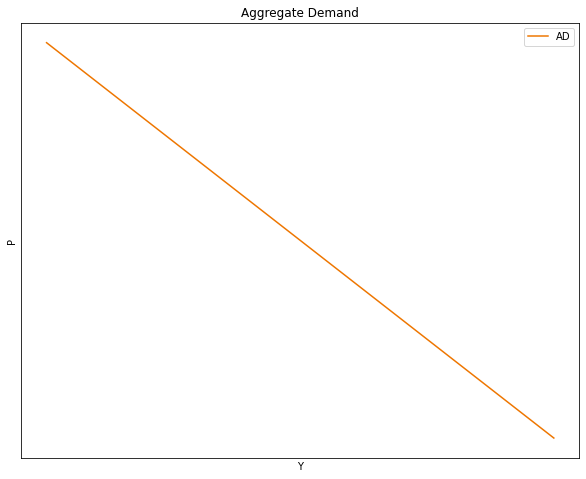

In [2]:
#Grafico de la Demanda Agregada

# Parámetros
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 20  

Y = np.arange(Y_size)

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

# Funcion de la demanda agregaga P(Y)
def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

y_max = np.max(P_AD)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aggregate Demand", xlabel= r'Y', ylabel= r'P')
ax.plot(Y, P_AD, "#EE7600", label = "AD")  

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.legend()
plt.show()

In [3]:
# Simbolos declarados
h, Ms, j, B0, B1, k, Y = symbols('h, Ms, j, B0, B1, k, Y')

# Ecuacion de la curva DA 
r_eq_DA = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)

# Diferenciales
df_r_eq_DA_Y = diff(r_eq_DA, Y)

print("La pendiente de la curva DA es", df_r_eq_DA_Y)  

La pendiente de la curva DA es -(B1*j + h*k)/h


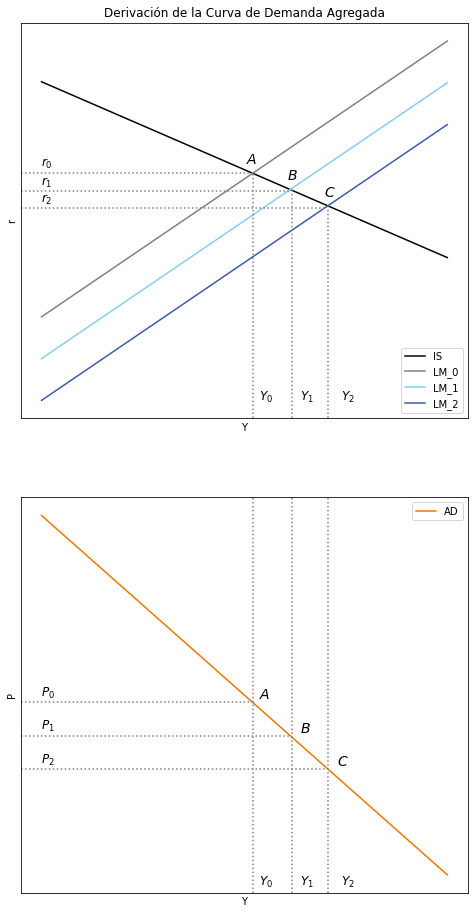

In [4]:
# Curva IS

# Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

# Curva LM 

# Parámetros
Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

# Curvas adicionales
Ms = 800
def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms1 = i_LM( k, j, Ms, P, Y)
Ms = 1400
def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms2 = i_LM( k, j, Ms, P, Y)

# Caracteristicas de figura
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

# Rectas
ax1.set(title="Derivación de la Curva de Demanda Agregada", xlabel= r'Y', ylabel= r'r')
ax1.plot(Y, r, label = "IS", color = "black") #IS
ax1.plot(Y, i, label="LM_0", color = "grey")  #LM_0
ax1.plot(Y, i_Ms1, label="LM_1", color = "skyblue")  #LM_1
ax1.plot(Y, i_Ms2, label="LM_2", color = "#3D59AB")  #LM_2


ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())


ax1.axvline(x=51.5,  ymin= 0, ymax= 0.62, linestyle = ":", color = "grey")
ax1.axvline(x=61,  ymin= 0, ymax= 0.58, linestyle = ":", color = "grey")
ax1.axvline(x=70,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")


ax1.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
ax1.axhline(y=80, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
ax1.axhline(y=68, xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")

# Etiquetas
ax1.text(50,100, '$A$', fontsize = 14, color = 'black')
ax1.text(60,88, '$B$', fontsize = 14, color = 'black')
ax1.text(69,76, '$C$', fontsize = 14, color = 'black')

# Etiquetas de los puntos de equilibrio - r 
ax1.text(0,98, '$r_0$', fontsize = 12, color = 'black')
ax1.text(0,84, '$r_1$', fontsize = 12, color = 'black')
ax1.text(0,72, '$r_2$', fontsize = 12, color = 'black')

#  Etiquetas de los puntos de equilibrio - Y
ax1.text(53,-70, '$Y_0$', fontsize = 12, color = 'black')
ax1.text(63,-70, '$Y_1$', fontsize = 12, color = 'black')
ax1.text(73,-70, '$Y_2$', fontsize = 12, color = 'black')

ax1.legend()

#------

ax2.set( xlabel= r'Y', ylabel= r'P')

ax2.plot(Y, P_AD, "#EE7600", label = "AD")  

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.axvline(x=51.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=61,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=70,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")

ax2.axhline(y=190, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
ax2.axhline(y=160, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
ax2.axhline(y=130, xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")

ax2.text(53,193, '$A$', fontsize = 14, color = 'black')
ax2.text(63,163, '$B$', fontsize = 14, color = 'black')
ax2.text(72,133, '$C$', fontsize = 14, color = 'black')

ax2.text(0,195, '$P_0$', fontsize = 12, color = 'black')
ax2.text(0,165, '$P_1$', fontsize = 12, color = 'black')
ax2.text(0,135, '$P_2$', fontsize = 12, color = 'black')

ax2.text(53,25, '$Y_0$', fontsize = 12, color = 'black')
ax2.text(63,25, '$Y_1$', fontsize = 12, color = 'black')
ax2.text(73,25, '$Y_2$', fontsize = 12, color = 'black')

ax2.legend()

plt.show()

### 2. Oferta Agregada ($OA$):
La oferta agregada, OA, es la cantidad de bienes y servicios que el conjunto de empresas de la economía de un determinado país, están dispuestas a ofrecer, en un período dado, a un precio determinado. La oferta agregada puede ser de corto y de largo.
Esta curva de OA de corto plazo es un periodo en el cual el producto $(Y)$ se ubica por debajo o por encima de su nivel de largo plazo o Producto Potencial ($Y ̅ $).

Entonces, curva de $OA$ de corto plazo se puede representar con la siguiente ecuación:

$$P=P^e+\theta(Y-Y ̅ )$$

Donde $(P)$ es el niveld e

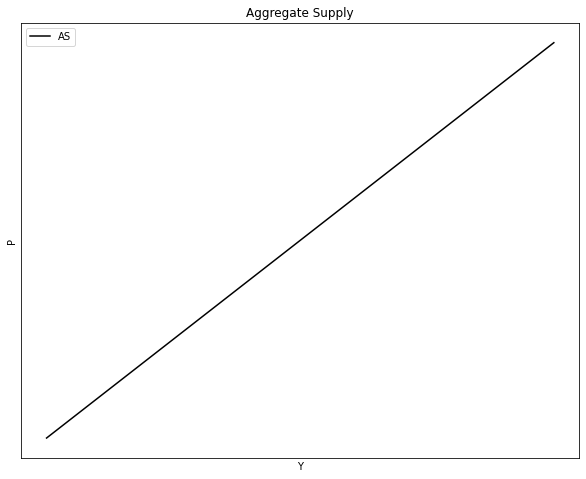

In [5]:
# Parámetros
Y_size = 100

Pe = 150   #precio esperado
θ = 10
_Y = 62   #producto potencial
Y = np.arange(Y_size)
# Curva de oferta
def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)
y_max = np.max(P_AS)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aggregate Supply", xlabel= r'Y', ylabel= r'P')
ax.plot(Y, P_AS, "k-", label = "AS")  
ax.legend()
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

plt.show()

In [6]:
# Simbolos declarados 
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Ecuacion de la curva DA 
r_eq_OA = Pe + θ*(Y-_Y)

# Diferenciales
df_r_eq_OA_Y = diff(r_eq_OA, Y)

print("La pendiente de la curva OA es", df_r_eq_OA_Y)  

La pendiente de la curva OA es θ


### 3. Equilibrio entre la Demanda Agregada y la Oferta Agregada : Modelo DA - OA

Recordando que en el modelo $DA-OA$ tenemos tres variables endógenas.

$$ Y^{eq}, r^{eq} ,P^{eq}$$

Considerando la ecuación de la demanda agregada $(DA)$:

$$P=\frac{hM_0^s+j\beta_0}{h}-\frac{j\beta_1+hk}{h}Y ...(1)$$

Y la ecuación de la oferta agregada $(OA)$:

$$P=P^e+\theta(Y-Y ̅ ) ...(2)$$

- Para hallar $ Y^{eq\_da\_oa}$ igualamos ecuaciones 1 y 2

$$\frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y = P^e + θ(Y - \bar{Y})$$

$$Y^{eq\_da\_oa} = [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})]$$

- Para encontrar $P^{eq}$ solamente reemplazamos $ Y^{eq}$ en la ecuación de oferta agregada

$$P^{eq\_da\_oa} = P^e + θ( Y^{eq\_da\_oa} - \bar{Y} )$$

$$P^{eq\_da\_oa} = P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} )$$


- Para encontrar $ r^{eq\_da\_oa}$ solamente reemplazamos $P^{eq\_da\_oa}$ en la ecuación de tasa de interés de equilibrio del modelo IS-LM.


- Tasa de interés de equilibrio:

$$r^{eq\_is\_lm} = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P)$$

- Tasa de interés de equilibrio en DA-OA

$$r^{eq\_is\_lm} = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^{eq\_da\_oa})$$

$$r^{eq\_da\_oa} = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) )$$


### Los valores de equilibrio de las tres principales variables endógenas 


1. $$Y^{eq\_da\_oa} = [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})]$$

2. $$r^{eq\_da\_oa} = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*\\
[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) )$$

3. $$P^{eq\_da\_oa} = P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} )$$

In [7]:
# Demanda Agregada

# Parámetros
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8
k = 2
j = 1                
Ms = 200             
P  = 8  
Y = np.arange(Y_size)

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)
def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

# Oferta Agregada

# Parámetros
Y_size = 100
Pe = 100 
θ = 3
_Y = 20   
Y = np.arange(Y_size)
# Ecuación
def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

# líneas punteadas autómaticas
# definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

# coordenadas de las curvas (x,y)
A = [P_AD[0], Y[0]] # DA, coordenada inicio
B = [P_AD[-1], Y[-1]] # DA, coordenada fin

C = [P_AS[0], Y[0]] # L_45, coordenada inicio
D = [P_AS[-1], Y[-1]] # L_45, coordenada fin

# Intersección
intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(192.39043824701196, 50.79681274900399)

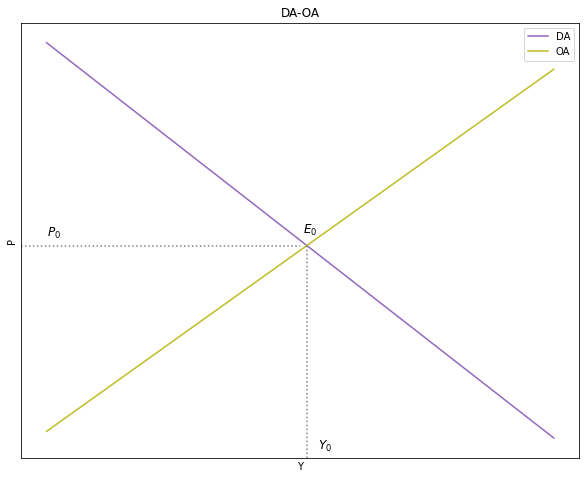

In [8]:
# Gráfico del modelo DA-OA

# Dimensiones del gráfico
y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas 
ax.plot(Y, P_AD, label = "DA", color = "C4") #DA
ax.plot(Y, P_AS, label = "OA", color = "C8") #OA

plt.axhline(y=intersec[0], xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "grey")

# Texto 
plt.text(0, 200, '$P_0$', fontsize = 12, color = 'black')
plt.text(53, 25, '$Y_0$', fontsize = 12, color = 'black')
plt.text(50, 202, '$E_0$', fontsize = 12, color = 'black')


ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Leyenda
ax.set(title="DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

In [9]:
# Variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# Variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Variables como símbolos para curva de oferta agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)

### Estática comparativa.

- Analice los efectos sobre las variables endógenas Y, P y r de una disminución del gasto fiscal.($∆G_0<0$) . El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P, Y(modelo DA-OA).

### Análisis intuitivo
$Modelo IS-LM:$

Una disminución del Gasto Fiscal genera una caída en la Demanda Agregada, por ende, se genera un desequilibrio, donde el nivel de producción resulta mayor a la demanda agregada. Por ende, para regresar al equilibrio $(DA = Y)$, el nivel de producción debe ajustarse a la demanda y disminuir también.

$$ G_o↓ → DA↓ → DA < Y → Y↓ $$

Esta disminución del nivel de producción genera una caída de la demanda de dinero $(Md = kY - jr)$. Esto genera un desequilibrio, debido a que, la oferta de dinero no se altera, por ende, la demanda resulta menor a la oferta. Entonces, para regresar al equilibrio $(Md = Ms)$, se debe ajustar la tasa de interés, de modo que esta debe bajar, para así poder estabilizar la demanda:

$$ Y↓ → Md↓ → Md < Ms → r↓ $$

$Modelo DA-OA$

La disminución en el nivel de producción genera que el nivel de precios también se contraiga:

$$ Y↓ → θ(Y - \bar{Y})↓ → P↓ $$

In [10]:
    ## Modelo IS-LM
    # Variables como símbolos
    Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')
 
    # Variables como símbolos
    k, j, Ms, P, Y = symbols('k j Ms P Y')
   
    # Beta_0 y beta_1
    beta_0 = (Co + Io + Go + Xo)
    beta_1 = ( 1-(b-m)*(1-t) )
     # Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
    r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
    Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [11]:
df_Y_eq_Go = diff(Y_eq, Go)
df_Y_eq_Go

j/(h*k + j*(-(1 - t)*(b - m) + 1))

In [12]:
df_r_eq_Go = diff(r_eq, Go)
df_r_eq_Go

k/(h*k + j*(-(1 - t)*(b - m) + 1))

In [13]:
#Modelo DA-OA
# Variables como símbolos
h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ  = symbols('h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ ')
# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )
# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (((h*Ms+j*beta_0)/h) - (Pe + θ*_Y))/(θ - ((j*beta_1+h*r)/h))
P_eq = ((h*Ms+j*beta_0)/h) - (((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ))


In [14]:
df_Y_eq_Go = diff(Y_eq, Go)
df_Y_eq_Go

j/(h*(θ - (h*r + j*(-(1 - t)*(b - m) + 1))/h))

In [15]:
df_P_eq_Go = diff(P_eq, Go)
df_P_eq_Go

j/h

In [16]:
#1--------------------------------------------------
# Curva IS ORIGINAL

# Parámetros
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8
Y = np.arange(Y_size)
# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

#2--------------------------------------------------
# Curva LM ORIGINAL

# Parámetros
Y_size = 100
k = 2
j = 1 
Ms = 200             
P  = 8           
Y = np.arange(Y_size)

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)
#--------------------------------------------------

# NUEVA curva IS: dismonución del gasto fiscal (Go)
# Definir SOLO el parámetro cambiado
Go = 25
# Nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_Go = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


In [17]:
# definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]
    
    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')
    
    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

# coordenadas de las curvas (x,y)
A = [r[0], Y[0]] 
B = [r[-1], Y[-1]] 

C = [i[0], Y[0]] 
D = [i[-1], Y[-1]] 

E = [r_Go[0], Y[0]]
F = [r_Go[-1], Y[-1]]

# creación de intersecciónón

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(87.21374045801527, 56.10687022900763)

In [18]:
intersec2 = line_intersection((E, F), (C, D))
intersec2

(68.1297709923664, 46.5648854961832)

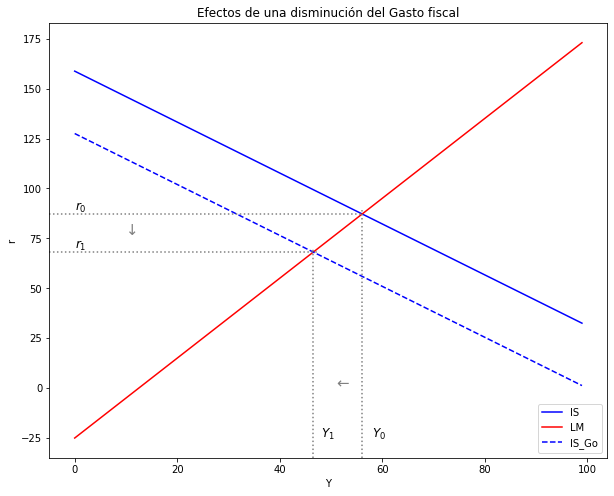

In [19]:
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))
#---------------------------------
# Gráfico 1: IS-LM\
ax.plot(Y, r, label = "IS", color = "blue") #IS
ax.plot(Y, i, label="LM", color = "red")  #LM
ax.plot(Y, r_Go, label="IS_Go", color = "blue", linestyle ='dashed')  #IS
ax.axvline(x=intersec[1],  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
ax.axvline(x=intersec2[1],  ymin= 0, ymax= 0.48, linestyle = ":", color = "grey")
ax.axhline(y=intersec2[0],  xmin= 0, xmax= 0.48, linestyle = ":", color = "grey")
ax.axhline(y=intersec[0],  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")
ax.text(51, 0, '←', fontsize=15, color='grey')
ax.text(10, 77, '↓', fontsize=15, color='grey')
ax.text(58, -25, '$Y_0$', fontsize=12, color='black')
ax.text(48, -25, '$Y_1$', fontsize=12, color='black')
ax.text(0, 89, '$r_0$', fontsize=12, color='black')
ax.text(0, 70, '$r_1$', fontsize=12, color='black')

ax.set(title="Efectos de una disminución del Gasto fiscal", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

In [20]:
#DA-OA
#1--------------------------
# Demanda Agregada ORGINAL

# Parámetros
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8
    
k = 2
j = 1                
Ms = 200             
P = 8  
    
Y = np.arange(Y_size)
# Ecuación
B0 = Co+Io+Go+Xo
B1 = 1-(b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD
    
P_AD = P_AD(h, Ms, j, B0, B1, k, Y)
#--------------------------------------------------

# NUEVA Demanda Agregada
# Parámetro cambiado 
Go = 25
B0 = Co + Io + Go + Xo
# Ecuación con el nuevo parámetro
def P_AD_Go(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Go = P_AD_Go(h, Ms, j, B0, B1, k, Y)

#2--------------------------
# Oferta Agregada original 
# Parámetros

Y_size = 100
Pe = 70
θ = 3
_Y = 20  
Y = np.arange(Y_size)
# Ecuación
def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS
    
P_AS = P_AS(Pe, _Y, Y, θ)

In [21]:
# definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]
    
    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')
    
    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y
    # coordenadas de las curvas (x,y)
G = [P_AD[0], Y[0]] 
H = [P_AD[-1], Y[-1]] 

I = [P_Go[0], Y[0]] 
J = [P_Go[-1], Y[-1]] 

K = [P_AS[0], Y[0]]
L = [P_AS[-1], Y[-1]] 
# creación de intersección
intersec = line_intersection((G, H), (K, L))
intersec # (y,x)\n


(176.73306772908367, 55.57768924302789)

In [22]:
intersec2 = line_intersection((I, J), (K, L))
intersec2

(161.79282868525897, 50.59760956175299)

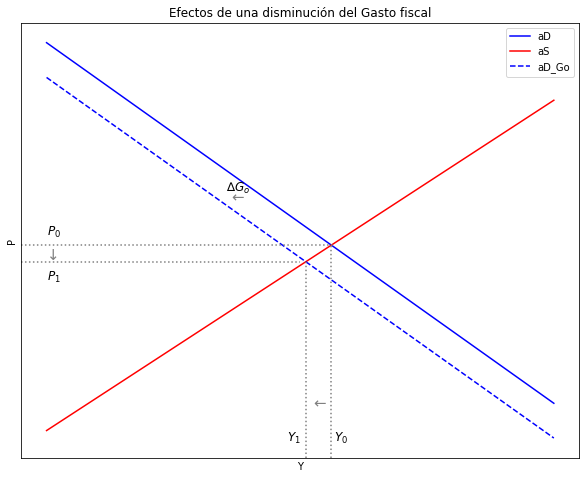

In [23]:
# Gráfico del modelo DA-OA

y_max = np.max(P_AD)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "aD", color = "blue") #DA
ax.plot(Y, P_AS, label = "aS", color = "red") #OA
ax.plot(Y, P_Go, label = "aD_Go", color = "blue", linestyle = 'dashed') #OA_Pe

ax.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "grey")
ax.axvline(x=intersec2[1],  ymin= 0, ymax= 0.45, linestyle = ":", color = "grey")
ax.axhline(y=intersec2[0],  xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
ax.axhline(y=intersec[0],  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")
    
ax.text(52, 30, '←', fontsize=15, color='grey')
ax.text(36, 215, '←', fontsize=15, color='grey')
ax.text(35, 225, '∆$G_o$', fontsize=12, color='black')
ax.text(0, 164, '↓', fontsize=15, color='grey')
    
ax.text(56, 0, '$Y_0$', fontsize=12, color='black')
ax.text(47, 0, '$Y_1$', fontsize=12, color='black')
ax.text(0, 185, '$P_0$', fontsize=12, color='black')
ax.text(0, 145, '$P_1$', fontsize=12, color='black')

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())
# leyenda
ax.set(title="Efectos de una disminución del Gasto fiscal", xlabel= r'Y', ylabel= r'P')
ax.legend()
plt.show()

- Analice los efectos sobre las variables endógenas Y, P y r de una disminución de la masa monetaria.($∆M^s<0$). El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P, Y (modelo DA-OA).

### Análisis Intuitivo
- Modelo IS-LM:

En este caso, si la masa monetaria disminuye, también lo hace la oferta, lo que genera un desequilibrio en el mercado de dinero, pues al no haber cambios en la demanda, esta se supone que se mantiene. Entonces, para regresar al nivel de equilibrio se debe subir la tasa de interés:

$$ Ms↓ → Mo↓ → Mo < Md → r↑ $$

Al subir la tasa de interés, la inversión baja, debido a su relación inversamente proporcional, por lo tanto, la demanda agregada baja. Esto genera un desequilibrio, pues esta resulta menor al nivel del producto. Entonces, para regresar al equilibrio el nivel de producción se debe ajustarse y por lo tanto, bajar.

$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$

- Modelo DA-OA:

Al bajar el nivel de producción, afecta a la oferta agregada, lo cual genera que el nivel de precios se contraiga:

$$ Y↓ → θ(Y-\bar{Y})↓ → P↓ $$

### Análisis Intuitivo
- Modelo IS-LM

En este caso el aumento de la tasa impositiva genera una reducción de la demanda agregada, debido a su relación inversamente proporcional, porque reduce el ingreso disponible de las familias para consumir. Al bajar el consumo, baja la demanda agregada. Esto genera un desequilibrio, pues el nivel de produciión se posiciona por encima de la demanda. Entonces, para regresar al equilibrio, se debe ajustar el nivel de producción, lo que implica que este se reduzca:

$$ t↑ → C↓ → DA↓ → DA < Y → Y↓ $$

Asimismo, una disminución del ingreso genera que la demanda de dinero se reduzca, y como la oferta de dinero se mantiene, se produce un desequilibrio, pues la oferta es mayor a la demanda. Entonces, para regresar al equilibrio se propone que la tasa de interés se reduzca

$$ Y↓ → M_d↓ → M_d < M_S → r↓ $$

- Modelo DA-OA

Esta reducción del nivel de producción, nuevamente, afecta a la oferta agregada, por lo tanto, el nivel de precios se reduce:

$$ Y↓ → θ(Y-\bar{Y})↓ → P↓ $$

In [24]:
# Variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# Variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [25]:
df_Y_eq_t = diff(Y_eq, t)
df_Y_eq_t

-Ms*h*j*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - j**2*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2

In [26]:
df_r_eq_t = diff(r_eq, t)
df_r_eq_t

Ms*j*(b - m)*(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - Ms*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))) - j*k*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2

In [27]:
# Variables como símbolos
h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ  = symbols('h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )
    
# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (((h*Ms+j*beta_0)/h) - Pe + θ*_Y)/(θ + ((j*beta_1+h*r)/h))
P_eq = ((h*Ms+j*beta_0)/h) - (((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ))


In [28]:
df_Y_eq_t = diff(Y_eq, t)
df_Y_eq_t

-j*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/(h*(θ + (h*r + j*(-(1 - t)*(b - m) + 1))/h)**2)

In [29]:
df_P_eq_t = diff(P_eq, t)
df_P_eq_t

-j*(b - m)*(P - Pe - _Y*θ)/(h*θ)

In [30]:
#1--------------------------------------------------
# Curva IS ORIGINAL

# Parámetros
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.1
Y = np.arange(Y_size)

# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

#2--------------------------------------------------
# Curva LM ORIGINAL

# Parámetros
Y_size = 100
k = 2
j = 1
Ms = 200 
P  = 20   
Y = np.arange(Y_size)

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_t = i_LM( k, j, Ms, P, Y)

In [31]:

# NUEVA curva IS:
# Parámetro cambiado
t = 3
# Ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t1 = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

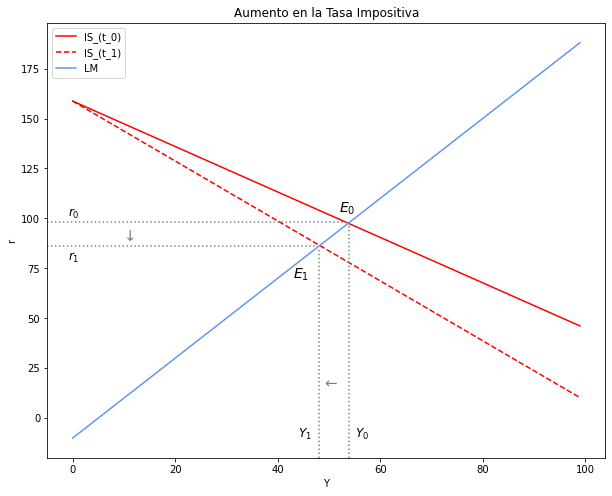

In [32]:
# Gráfico

y_max = np.max(i_t)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_t, label = "IS_(t_0)", color = "red") #IS_orginal
ax.plot(Y, r_t1, label = "IS_(t_1)", color = "red", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i_t, label="LM", color = "#6495ED")  #LM_original

# Texto
plt.axvline(x=48,  ymin= 0, ymax= 0.48, linestyle = ":", color = "grey")
plt.axhline(y=86, xmin= 0, xmax= 0.48, linestyle = ":", color = "grey")

plt.axvline(x=54,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")
plt.axhline(y=98, xmin= 0, xmax= 0.54, linestyle = ":", color = "grey")

plt.text(43,70, '$E_1$', fontsize = 14, color = 'black')
plt.text(52,103, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,101, '$r_0$', fontsize = 12, color = 'black')
plt.text(-1,79, '$r_1$', fontsize = 12, color = 'black')
plt.text(55,-10, '$Y_0$', fontsize = 12, color = 'black')
plt.text(44,-10, '$Y_1$', fontsize = 12, color = 'black')

plt.text(49, 15, '←', fontsize=15, color='grey')
plt.text(10, 89, '↓', fontsize=15, color='grey')

# Leyenda
ax.set(title="Aumento en la Tasa Impositiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

In [33]:
#1--------------------------
# Demanda Agregada ORGINAL

# Parámetros
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.1

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)
def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD_t = P_AD(h, Ms, j, B0, B1, k, Y)

#2--------------------------
# Oferta Agregada ORIGINAL

# Parámetros
Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS_t = P_AS(Pe, _Y, Y, θ)

In [34]:
#--------------------------------------------------
# NUEVA Demanda Agregada

# Parámetro cambiado

t = 5

B1 = 1 - (b-m)*(1-t)

# Ecuación con el nuevo parámetro

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD_t1 = P_AD(h, Ms, j, B0, B1, k, Y)

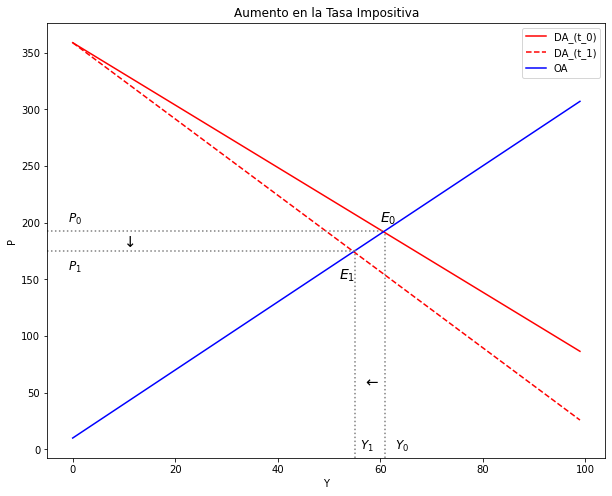

In [35]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(P_AS_t)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, P_AD_t1, label = "DA_(t_0)", color = "red") 
ax.plot(Y, P_AD_t, label = "DA_(t_1)", color = "red", linestyle = 'dashed')

ax.plot(Y, P_AS_t, label="OA", color = "blue")  

# Texto y figuras agregadas
plt.axvline(x=55,  ymin= 0, ymax= 0.48, linestyle = ":", color = "grey")
plt.axhline(y=175, xmin= 0, xmax= 0.55, linestyle = ":", color = "grey")

plt.axvline(x=61,  ymin= 0, ymax= 0.52, linestyle = ":", color = "grey")
plt.axhline(y=193, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")

plt.text(52,150, '$E_1$', fontsize = 14, color = 'black')
plt.text(60,200, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,200, '$P_0$', fontsize = 12, color = 'black')
plt.text(-1,158, '$P_1$', fontsize = 12, color = 'black')
plt.text(63,0, '$Y_0$', fontsize = 12, color = 'black')
plt.text(56, 0, '$Y_1$', fontsize = 12, color = 'black')

plt.text(57, 55, '←', fontsize=15, color='black')
plt.text(10, 179, '↓', fontsize=15, color='black')

# Título, ejes y leyenda
ax.set(title="Aumento en la Tasa Impositiva", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()